In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
#df_times = pd.read_csv("Berlin_Marathon_data_1974_2019.csv", low_memory=False)
#df_weather = pd.read_csv("Berlin_Marathon_weather_data_since_1974.csv", low_memory=False)
df = pd.read_csv('data/master_berlin_data.csv')

In [3]:
df_times.head()

,YEAR,COUNTRY,GENDER,AGE,TIME
0,1974,NaN,male,L1,02:44:53
1,1974,NaN,male,L2,02:46:43
2,1974,NaN,male,L2,02:48:08
3,1974,NaN,male,L,02:48:40
4,1974,NaN,male,L1,02:49:01


In [22]:
df_weather

,YEAR,PRECIP_mm,SUNSHINE_hrs,CLOUD_hrs,ATMOS_PRESS_mbar,AVG_TEMP_C,MAX_TEMP_C,MIN_TEMP_C
0,1974,0.0,0.20,7.0,1009.50,5.4,8.8,1.1
1,1975,4.2,9.40,3.0,1011.40,14.3,20.1,9.5
2,1976,3.0,10.20,3.3,1010.40,12.8,18.0,7.3
3,1977,11.2,0.00,8.0,1013.10,9.7,12.5,7.4
4,1978,1.8,2.70,6.0,1000.60,11.2,14.5,9.4
5,1979,0.0,5.40,2.0,1019.00,8.4,15.2,2.9
6,1980,0.0,10.10,0.7,1017.50,9.8,17.5,4.9
7,1981,0.1,3.60,7.3,1000.90,16.3,21.5,14.8
8,1982,0.7,10.10,1.0,1004.00,17.6,25.4,12.0
9,1983,0.0,9.80,2.3,1021.40,11.2,20.3,9.3


In [5]:
def get_seconds(time_str_series):
    # split in hh, mm, ss
    time_lst = []
    try:
        for i in time_str_series:
            hh, mm, ss = i.split(':')
            time_lst.append(int(hh) * 3600 + int(mm) * 60 + int(ss))
    except ValueError:
        return [i, 'is the broken one']
    return time_lst

In [6]:
df_times

,YEAR,COUNTRY,GENDER,AGE,TIME
0,1974,NaN,male,L1,02:44:53
1,1974,NaN,male,L2,02:46:43
2,1974,NaN,male,L2,02:48:08
3,1974,NaN,male,L,02:48:40
4,1974,NaN,male,L1,02:49:01
...,...,...,...,...,...
884939,2019,GER,male,65,07:12:17
884940,2019,GER,male,75,07:12:30
884941,2019,GER,male,80,07:15:28
884942,2019,USA,male,30,07:19:28


In [7]:
df_times = df_times[['YEAR', 'GENDER', 'AGE', 'TIME']]

In [8]:
df_times

,YEAR,GENDER,AGE,TIME
0,1974,male,L1,02:44:53
1,1974,male,L2,02:46:43
2,1974,male,L2,02:48:08
3,1974,male,L,02:48:40
4,1974,male,L1,02:49:01
...,...,...,...,...
884939,2019,male,65,07:12:17
884940,2019,male,75,07:12:30
884941,2019,male,80,07:15:28
884942,2019,male,30,07:19:28


In [9]:
df_times = df_times[['YEAR', 'GENDER', 'TIME']]

In [10]:
df_times.isna().value_counts()

YEAR   GENDER  TIME 
False  False   False    884944
dtype: int64

In [11]:
df_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884944 entries, 0 to 884943
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   YEAR    884944 non-null  int64 
 1   GENDER  884944 non-null  object
 2   TIME    884944 non-null  object
dtypes: int64(1), object(2)
memory usage: 20.3+ MB


In [12]:
df_times.query('TIME == "no time"')

,YEAR,GENDER,TIME
1016,1977,male,no time
1017,1977,male,no time
3786,1981,male,no time
3787,1981,male,no time
3788,1981,male,no time
...,...,...,...
167410,1995,male,no time
167411,1995,male,no time
183344,1996,male,no time
183345,1996,male,no time


In [13]:
df_times = df_times.query('TIME != "no time"')

In [14]:
df_times['TIME'] = get_seconds(df_times['TIME'])

In [15]:
df_list = []

def make_df_list():

    year = 1974

    while year <= 2019:
        x = df_times.query(f'YEAR == {year}')
        year += 1
        df_list.append(x)

In [16]:
make_df_list()

In [17]:
df_list

[     YEAR GENDER   TIME
 0    1974   male   9893
 1    1974   male  10003
 2    1974   male  10088
 3    1974   male  10120
 4    1974   male  10141
 ..    ...    ...    ...
 239  1974   male  20483
 240  1974   male  20807
 241  1974   male  20807
 242  1974   male  21153
 243  1974   male  21353
 
 [244 rows x 3 columns],
      YEAR GENDER   TIME
 244  1975   male  10028
 245  1975   male  10106
 246  1975   male  10202
 247  1975   male  10410
 248  1975   male  10466
 ..    ...    ...    ...
 472  1975   male  20405
 473  1975   male  20784
 474  1975   male  21370
 475  1975   male  21557
 476  1975   male  21582
 
 [233 rows x 3 columns],
      YEAR GENDER   TIME
 477  1976   male   8588
 478  1976   male   8699
 479  1976   male   8787
 480  1976   male   8902
 481  1976   male   9137
 ..    ...    ...    ...
 783  1976   male  20104
 784  1976   male  20290
 785  1976   male  20842
 786  1976   male  21426
 787  1976   male  21719
 
 [311 rows x 3 columns],
       YEAR  GENDER

In [18]:
new_dfs = []

def make_df():

    year = 1974

    for df in df_list:
        x = df.describe().transpose()
        x.drop(index='YEAR', inplace=True)
        x.reset_index(inplace=True, drop=True)
        x.insert(0, "year", year)
        x = x[['year', 'mean', 'min', '50%', 'max']]
        x.columns = ['year', 'avg_time', 'fastest', 'median_time', 'slowest']
        new_dfs.append(x)
        year += 1

In [19]:
make_df()

In [20]:
master_times = pd.concat(new_dfs, ignore_index=True)

In [21]:
master_times

,year,avg_time,fastest,median_time,slowest
0,1974,15052.725410,9893.0,14908.5,21353.0
1,1975,14735.639485,10028.0,14251.0,21582.0
2,1976,13177.877814,8588.0,12712.0,21719.0
3,1977,12382.859649,8180.0,12214.0,19076.0
4,1978,NaN,NaN,NaN,NaN
5,1979,12584.328829,8469.0,12427.5,19570.0
6,1980,NaN,NaN,NaN,NaN
7,1981,13590.503535,8142.0,13440.5,28723.0
8,1982,13874.243329,7924.0,13819.5,18428.0
9,1983,13181.544102,7928.0,13087.0,18626.0


In [24]:
df_weather.rename(columns={"YEAR":"year"}, inplace=True)

In [26]:
df_weather

,year,PRECIP_mm,SUNSHINE_hrs,CLOUD_hrs,ATMOS_PRESS_mbar,AVG_TEMP_C,MAX_TEMP_C,MIN_TEMP_C
0,1974,0.0,0.20,7.0,1009.50,5.4,8.8,1.1
1,1975,4.2,9.40,3.0,1011.40,14.3,20.1,9.5
2,1976,3.0,10.20,3.3,1010.40,12.8,18.0,7.3
3,1977,11.2,0.00,8.0,1013.10,9.7,12.5,7.4
4,1978,1.8,2.70,6.0,1000.60,11.2,14.5,9.4
5,1979,0.0,5.40,2.0,1019.00,8.4,15.2,2.9
6,1980,0.0,10.10,0.7,1017.50,9.8,17.5,4.9
7,1981,0.1,3.60,7.3,1000.90,16.3,21.5,14.8
8,1982,0.7,10.10,1.0,1004.00,17.6,25.4,12.0
9,1983,0.0,9.80,2.3,1021.40,11.2,20.3,9.3


In [27]:
master = pd.merge(master_times, df_weather, on='year')

In [28]:
master

,year,avg_time,fastest,median_time,slowest,PRECIP_mm,SUNSHINE_hrs,CLOUD_hrs,ATMOS_PRESS_mbar,AVG_TEMP_C,MAX_TEMP_C,MIN_TEMP_C
0,1974,15052.725410,9893.0,14908.5,21353.0,0.0,0.20,7.0,1009.50,5.4,8.8,1.1
1,1975,14735.639485,10028.0,14251.0,21582.0,4.2,9.40,3.0,1011.40,14.3,20.1,9.5
2,1976,13177.877814,8588.0,12712.0,21719.0,3.0,10.20,3.3,1010.40,12.8,18.0,7.3
3,1977,12382.859649,8180.0,12214.0,19076.0,11.2,0.00,8.0,1013.10,9.7,12.5,7.4
4,1978,NaN,NaN,NaN,NaN,1.8,2.70,6.0,1000.60,11.2,14.5,9.4
5,1979,12584.328829,8469.0,12427.5,19570.0,0.0,5.40,2.0,1019.00,8.4,15.2,2.9
6,1980,NaN,NaN,NaN,NaN,0.0,10.10,0.7,1017.50,9.8,17.5,4.9
7,1981,13590.503535,8142.0,13440.5,28723.0,0.1,3.60,7.3,1000.90,16.3,21.5,14.8
8,1982,13874.243329,7924.0,13819.5,18428.0,0.7,10.10,1.0,1004.00,17.6,25.4,12.0
9,1983,13181.544102,7928.0,13087.0,18626.0,0.0,9.80,2.3,1021.40,11.2,20.3,9.3


In [29]:
master.to_csv("master_berlin_data.csv", index=False)

<AxesSubplot:xlabel='year', ylabel='fastest'>

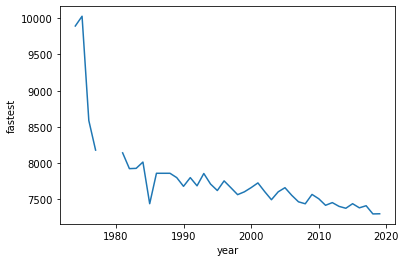

In [7]:

sns.lineplot(x='year', y='fastest', data=df)

In [19]:
finishers = pd.read_csv('data/Berlin_Finishers - Sheet1.csv')
finishers = finishers.rename(columns={"Year": "year"})
finishers = finishers.iloc[::-1]

In [53]:
master = pd.merge(df, finishers, on='year')
master = master.rename(columns={'Males.1': 'percent_male', 'Females.1': 'percent_female'})
def convert_string_with_commas_to_int(series):
    new_series = []
    for i in series:
        try:
            i = int(i)
            new_series.append(i)
        except ValueError:
            i = i.split(',')
            i = ''.join(i)
            new_series.append(i)
    return pd.Series(new_series)
master['Total'] = convert_string_with_commas_to_int(master['Total'])
type(master['Total'][1])

int

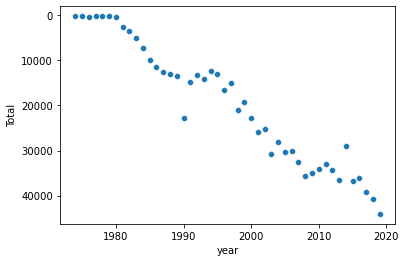

In [59]:
total_graph = sns.scatterplot(data=master, x='year', y='Total')

In [40]:
int('1,234')

ValueError: invalid literal for int() with base 10: '1,234'